In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class EnzymeKinetics:
    def __init__(self, k1, k2, k3, k4, k5, S0, E0, A0, P0, I0, B0):
        self.k1 = k1
        self.k2 = k2
        self.k3 = k3
        self.k4 = k4
        self.k5 = k5
        
        self.S = [S0]
        self.E = [E0]
        self.A = [A0]
        self.P = [P0]
        self.I = [I0]
        self.B = [B0]
    
    def euler(self, dt):
        S = self.S[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1])
        E = self.E[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1] + self.k3*self.A[-1] - self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        A = self.A[-1] + dt*(self.k1*self.S[-1]*self.E[-1] - self.k2*self.A[-1] - self.k3*self.A[-1])
        P = self.P[-1] + dt*(self.k3*self.A[-1])
        I = self.I[-1] + dt*(-self.k4*self.E[-1]*self.I[-1] + self.k5*self.B[-1])
        B = self.B[-1] + dt*(self.k4*self.E[-1]*self.I[-1] - self.k5*self.B[-1])
        self.S.append(S)
        self.E.append(E)
        self.A.append(A)
        self.P.append(P)
        self.I.append(I)
        self.B.append(B)
        return self.S, self.E, self.A, self.P, self.I, self.B

        

In [3]:
N = 100 # number of intervalls.
tMax = 2000 #seconds.
t = np.linspace(0,tMax,N)
dt = tMax/N

In [23]:
def plot1(x):
    plt.rcdefaults()
    plt.rcParams.update({'font.sans-serif':'Times New Roman'})
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[A]")
    plt.plot(t, EK.P, label="[P]")
    plt.xlabel("Tid",fontsize=12)
    plt.ylabel("Koncentration", fontsize=12)
    plt.title("Modell utan inhibitor med Enzymkoncentration " + str(round(EK.E[0],10)) + " M")
    plt.legend()
    print("Slutkoncentration av Produkt " + str(EK.P[-1]))
    print("Slutkoncentration av Substrat " + str(EK.S[-1]))
    print("Slutkoncentration av Enzym " + str(EK.E[-1]))
    print("Slutkoncentration av Enzym-Substratkomplex " + str(float(EK.A[-1])))
    print("Slutkoncentration av Enzym-Inhibitorkomplex " + str(EK.B[-1]))
    print("Slutkoncentration av Inhibitor " + str(EK.I[-1]))
    plt.savefig(x, bbox_inches="tight", pad_inches=1)

In [34]:
def plot2(x):
    plt.rcdefaults()
    plt.rcParams.update({'font.sans-serif':'Times New Roman'})
    plt.plot(t, EK.S, label="[S]")
    plt.plot(t, EK.E, label="[E]")
    plt.plot(t, EK.A, label="[A]")
    plt.plot(t, EK.P, label="[P]")
    plt.plot(t, EK.B, label="[B]")
    plt.plot(t, EK.I, label="[I]")
    plt.xlabel("Tid",fontsize=12)
    plt.ylabel("Koncentration", fontsize=12)
    plt.title("Modell med inhibitor med Enzymkoncentration " + str(round(EK.E[0],10)) + " M och Inhibitorkoncentration " + str(round(EK.I[0],10)) + " M")
    plt.legend()
    print("Slutkoncentration av Produkt " + str(EK.P[-1]))
    print("Slutkoncentration av Substrat " + str(EK.S[-1]))
    print("Slutkoncentration av Enzym " + str(EK.E[-1]))
    print("Slutkoncentration av Enzym-Substratkomplex " + str(EK.A[-1]))
    print("Slutkoncentration av Enzym-Inhibitorkomplex " + str(EK.B[-1]))
    print("Slutkoncentration av Inhibitor " + str(EK.I[-1]))
    plt.savefig(x, bbox_inches="tight", pad_inches=1)

Modell utan inhibitor

Slutkoncentration av Produkt 1.3413099219312349e-05
Slutkoncentration av Substrat 4.7590544905601327e-07
Slutkoncentration av Enzym 7.890046683683584e-07
Slutkoncentration av Enzym-Substratkomplex 1.1099533163164137e-07
Slutkoncentration av Enzym-Inhibitorkomplex 0.0
Slutkoncentration av Inhibitor 0.0


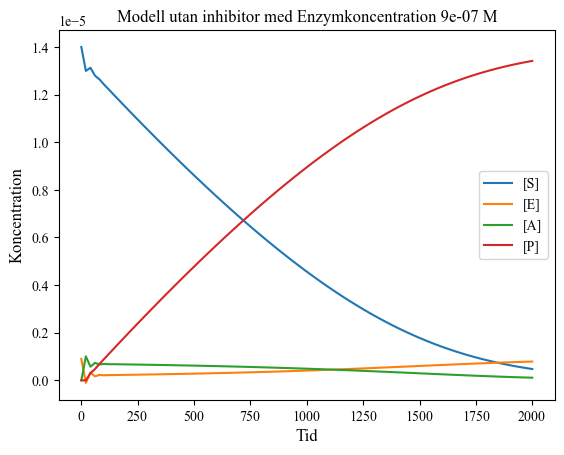

In [37]:
EK = EnzymeKinetics(4000,0.001,0.015,0,0,(14*10**-6),(90*10**-8),0,0,0,0)

for i in range(N-1):
    EK.euler(dt)
    
plot1("Utan Inhibitor 1")

In [38]:
EK.E[0] == EK.A[-1]+EK.E[-1] #kontroll av att enzymkocentrationen stämmer Om vi ej sätter till 0 returnas false (men det är nog pga ett avrundningsfel på 10**-14)
print(EK.E[0],EK.A[-1],EK.E[-1])

9.000000000000001e-07 1.1099533163164137e-07 7.890046683683584e-07


Modell med inhibitor

Slutkoncentration av Produkt 9.58525592283723e-06
Slutkoncentration av Substrat 4.279187449688118e-06
Slutkoncentration av Enzym 1.2126110597008373e-07
Slutkoncentration av Enzym-Substratkomplex 1.3555662747464695e-07
Slutkoncentration av Enzym-Inhibitorkomplex 6.431822665552696e-07
Slutkoncentration av Inhibitor 2.568177334447306e-07


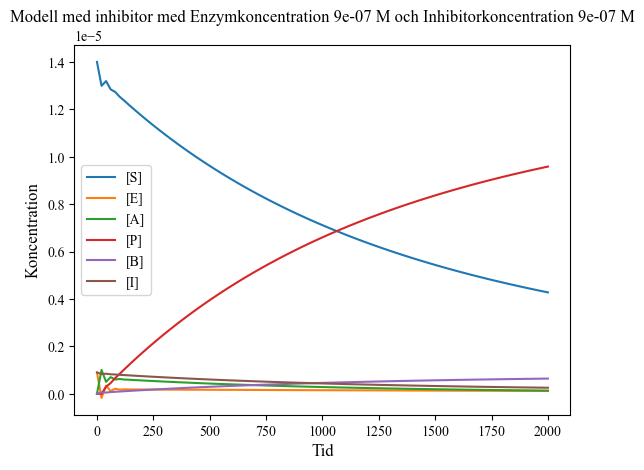

In [39]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(90*10**-8),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("Med inhibitor 1")

Slutkoncentration av Produkt 1.3258407738127142e-05
Slutkoncentration av Substrat 6.14866386040955e-07
Slutkoncentration av Enzym 7.126027443880368e-07
Slutkoncentration av Enzym-Substratkomplex 1.267258758319101e-07
Slutkoncentration av Enzym-Inhibitorkomplex 6.067137978005297e-08
Slutkoncentration av Inhibitor 2.3286202199470273e-09


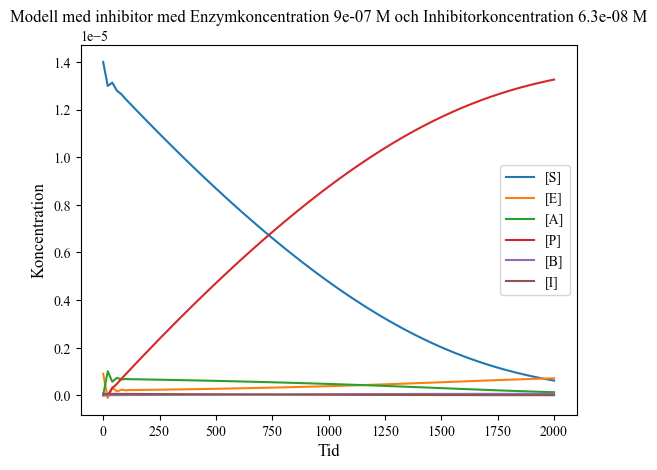

In [40]:
EK = EnzymeKinetics(4000,0.001,0.015,4000,(5.32*10**-6),(14*10**-6),(90*10**-8),0,0,(6.3*10**-8),0)

for i in range(N-1):
    EK.euler(dt)
    
plot2("Med inhibitor 2")